## The goal
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import math

%matplotlib inline

In [2]:
# url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
# !wget $url

In [3]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
len(df)

9704

In [6]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

Text(0.5, 0, 'Miles per Gallon')

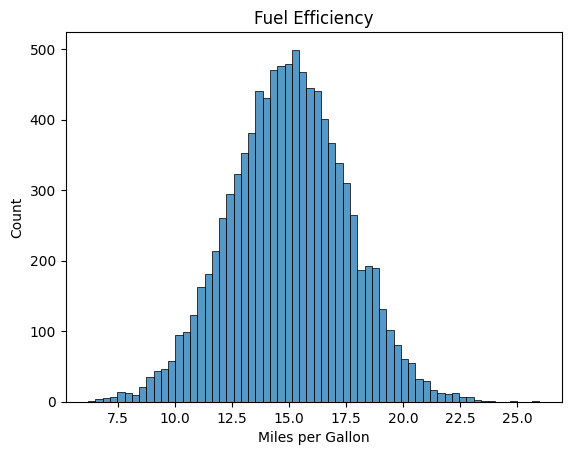

In [7]:
plot = sns.histplot(df["fuel_efficiency_mpg"])
plot.set_title("Fuel Efficiency")
plot.set_xlabel("Miles per Gallon")

#### Calculate skewness using the `skew` function.

In [8]:
skewness = df["fuel_efficiency_mpg"].skew()
skewness

np.float64(-0.012062219273507922)

The `skewness` value is < 0 that means there is a left long tail.

#### Calculate skewness using the `mean` and `median` functions

In [9]:
mean = df["fuel_efficiency_mpg"].mean()
median = df["fuel_efficiency_mpg"].median()

[mean, median, median - mean]

[np.float64(14.985243228208573),
 np.float64(15.006036963481211),
 np.float64(0.020793735272638614)]

The `median` value is more than the `mean` value that means there is a left long tail.

Since the `skewness` value is pretty small, we can say that there is no long tail in our dataset.

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [10]:
base_features = ["engine_displacement", "horsepower",
         "vehicle_weight", "model_year", "fuel_efficiency_mpg"]
base_features

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [11]:
df = df[base_features]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [12]:
is_null_columns = df.isnull().sum()
is_null_columns

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [13]:
is_null_columns[is_null_columns > 0].index[0]

'horsepower'

In [14]:
print(
    f"The column with the missing values is '{is_null_columns[is_null_columns > 0].index[0]}'")

The column with the missing values is 'horsepower'


### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [15]:
print(f"The median for the 'horsepower' column is {df["horsepower"].median()}")

The median for the 'horsepower' column is 149.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [16]:
def split_dataset(df, seed=42):
    np.random.seed(seed)

    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].copy()

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    return df_train, df_val, df_test

In [17]:
df_train, df_validation, df_test = split_dataset(df)
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [18]:
df_validation

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419
...,...,...,...,...,...
7802,290,205.0,3403.401496,2019,13.868607
6780,200,159.0,2752.516039,2009,15.665403
7541,230,202.0,3303.000688,2008,13.613127
1577,220,169.0,3293.420251,2008,13.733343


In [19]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3729,140,148.0,2704.826005,2017,15.804354
7764,210,136.0,3001.227490,2004,14.272374
4358,210,152.0,3747.467392,2021,11.748441
5922,190,128.0,2705.833636,2014,16.485991
1343,230,156.0,2505.939657,2005,17.779704
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

#### Common functions

In [20]:
def get_X_y(df: DataFrame, y_column_name="fuel_efficiency_mpg"):
    y_result = df[y_column_name].values
    X_result = df.drop([y_column_name], axis=1).values

    return X_result, y_result

In [21]:
def create_copy_and_fill_with_value(df: DataFrame, value: float, column_name="horsepower"):
    result = df.copy(deep=True)
    result[column_name] = df[column_name].fillna(value)

    return result

In [22]:
def train_linear_regression(X, y):
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    result = XTX_inv.dot(XT).dot(y)
    return result

In [23]:
def calculate_weights(X, y):
    ones = np.ones(X.shape[0])
    X_extended = np.column_stack([ones, X])
    linear_regression_result = train_linear_regression(X_extended, y)

    w0 = linear_regression_result[0]
    weights = linear_regression_result[1:]

    return w0, weights


In [24]:
import matplotlib.pyplot as plt

def plot_feature_weights(weights, subtitle=""):
    """
    Plots a bar chart to visualize the impact of feature weights.

    Parameters:
    - weights (list or array): Corresponding weights for the features.
    - title (str): Title of the plot (default: "Impact of Each Weight on Fuel Efficiency (MPG)").
    """
    feature_names = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]
    title=f"Impact of Each Weight on Fuel Efficiency (MPG){subtitle}"

    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, weights, color='skyblue')

    # Add labels and title
    plt.xlabel("Features")
    plt.ylabel("Weights")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

#### Question 3.1. Fill missing values with 0.

In [25]:
df_train_with_zeros = create_copy_and_fill_with_value(df_train, value=0)

X_train_with_zeros, y_train_with_zeros = get_X_y(df_train_with_zeros)
[X_train_with_zeros, y_train_with_zeros]

[array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
        [ 160.        ,  141.        , 2741.17048439, 2019.        ],
        [ 230.        ,  155.        , 2471.88023726, 2017.        ],
        ...,
        [ 210.        ,  152.        , 2500.17568746, 2020.        ],
        [ 250.        ,  154.        , 2254.31324473, 2002.        ],
        [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
       shape=(5824, 4)),
 array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
        18.92574819, 17.96528447], shape=(5824,))]

In [26]:
df_validation_with_zeros = create_copy_and_fill_with_value(df_validation, value=0)
X_validation_with_zeros, y_validation_with_zeros = get_X_y(df_validation_with_zeros)

df_test_with_zeros = create_copy_and_fill_with_value(df_test, value=0)
X_test, y_test = get_X_y(df_test_with_zeros)

In [27]:
w0_for_zeros_as_na, weights_for_zeros_as_na = calculate_weights(X_train_with_zeros, y_train_with_zeros)
[w0_for_zeros_as_na, weights_for_zeros_as_na]

[np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04])]

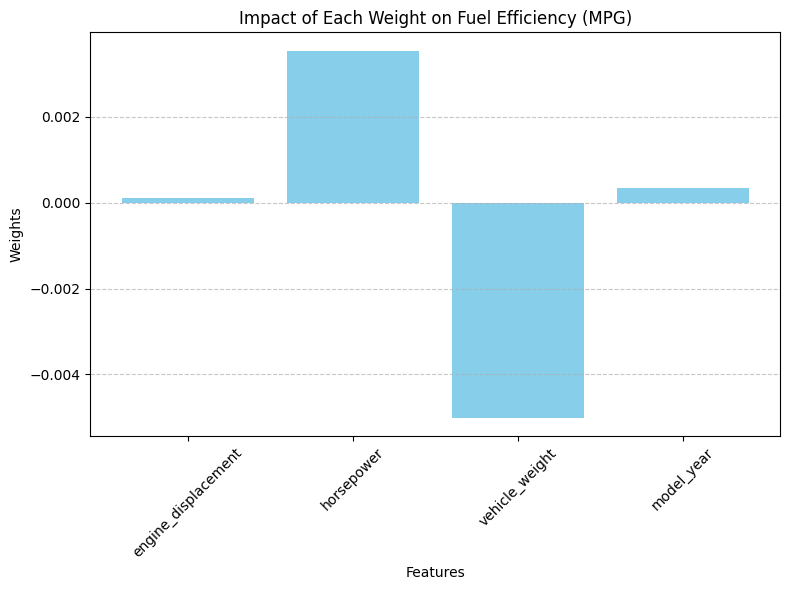

In [28]:
plot_feature_weights(weights_for_zeros_as_na)

#### Question 3.2. Fill missing values with the "mean".

In [29]:
mean = df_train["horsepower"].mean()
mean

np.float64(149.54476367006487)

In [30]:
df_train_with_mean = create_copy_and_fill_with_value(df_train, mean)
df_train_with_mean[df_train_with_mean["horsepower"] == mean].head(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
2997,300,149.544764,3217.664208,2000,14.072469
7364,200,149.544764,3090.672180,2007,14.326764


In [31]:
X_train_mean, y_train_mean = get_X_y(df_train_with_mean)
[X_train_mean, y_train_mean]

[array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
        [ 160.        ,  141.        , 2741.17048439, 2019.        ],
        [ 230.        ,  155.        , 2471.88023726, 2017.        ],
        ...,
        [ 210.        ,  152.        , 2500.17568746, 2020.        ],
        [ 250.        ,  154.        , 2254.31324473, 2002.        ],
        [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
       shape=(5824, 4)),
 array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
        18.92574819, 17.96528447], shape=(5824,))]

In [32]:
w0_for_mean_as_na, weights_for_mean_as_na = calculate_weights(X_train_mean, y_train_mean)
[w0_for_mean_as_na, weights_for_mean_as_na.round(4)]

[np.float64(28.925259951002698), array([ 0.0001,  0.0103, -0.005 , -0.0002])]

In [33]:
df_validation_with_mean = create_copy_and_fill_with_value(df_validation, value=mean)
X_validation_with_mean, y_validation_with_mean = get_X_y(df_validation_with_mean)


df_test_with_mean = create_copy_and_fill_with_value(df_test, value=mean)
X_test_with_mean, y_test_with_mean = get_X_y(df_test_with_mean)

In [34]:
[w0_for_zeros_as_na, weights_for_zeros_as_na.round(4)]

[np.float64(28.82736547365895), array([ 0.0001,  0.0035, -0.005 ,  0.0003])]

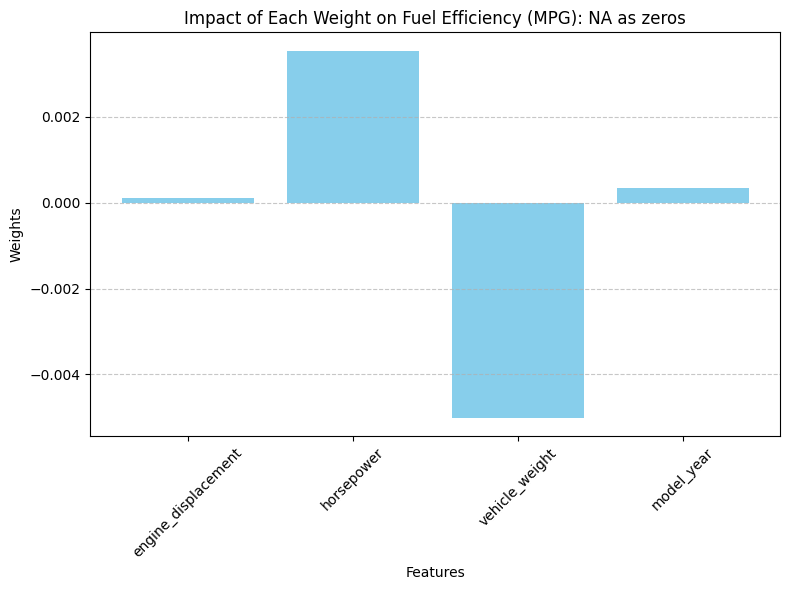

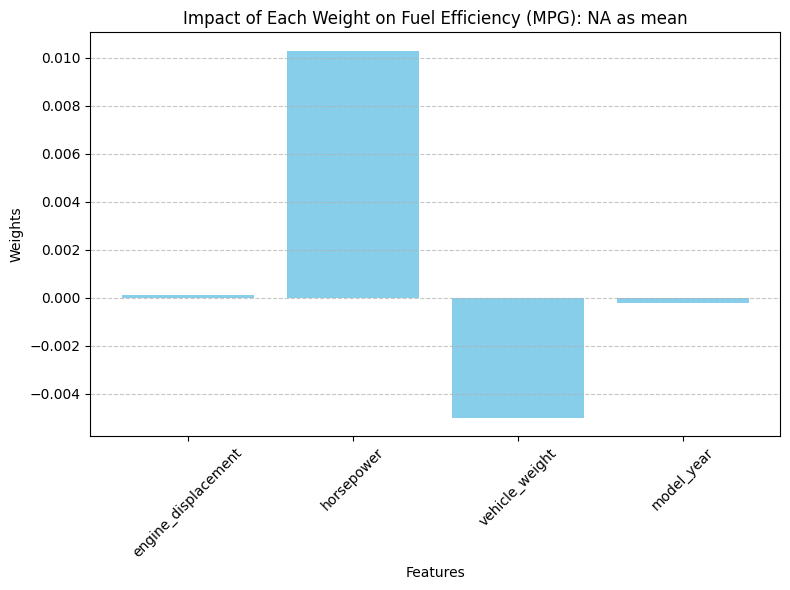

In [35]:
plot_feature_weights(weights_for_zeros_as_na, subtitle=": NA as zeros")
plot_feature_weights(weights_for_mean_as_na, subtitle=": NA as mean")


#### Lets analyze, how close our predictions are to the `training` dataset
Please see the quantification with the `validation` dataset below.

##### In case of replacing NA with zeros

In [36]:
def create_diagram(y_actual, y_pred, title):
    # Start a new diagram
    plt.figure(figsize=(15, 6))

    # Plot the histograms
    sns.histplot(y_actual, color="red",
                 alpha=0.5, label="Actual")
    sns.histplot(y_pred, color="cyan", alpha=0.5, label="Predicted")

    # Add a legend and title for clarity
    plt.legend()

    plt.title(title)

    # Show the plot
    plt.show()
    plt.close()

In [37]:
y_predict_with_zeros = w0_for_zeros_as_na + X_train_with_zeros.dot(weights_for_zeros_as_na)
y_predict_with_zeros

array([17.33526223, 16.29296317, 17.69885099, ..., 17.54541307,
       18.78287539, 17.86564843], shape=(5824,))

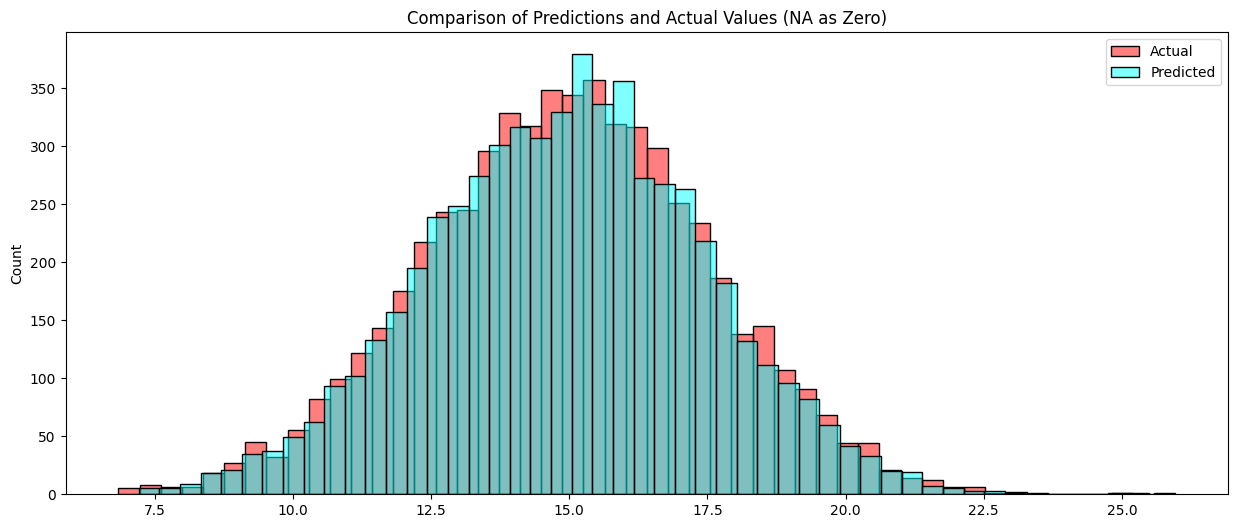

In [38]:
create_diagram(y_train_with_zeros, y_predict_with_zeros, "Comparison of Predictions and Actual Values (NA as Zero)")


##### In case of replacing NA with `mean`

In [39]:
y_predict_for_mean_as_na = w0_for_mean_as_na + X_train_mean.dot(weights_for_mean_as_na)
y_predict_for_mean_as_na

array([17.25910991, 16.19011261, 17.6924588 , ..., 17.51666431,
       18.77812427, 17.84593445], shape=(5824,))

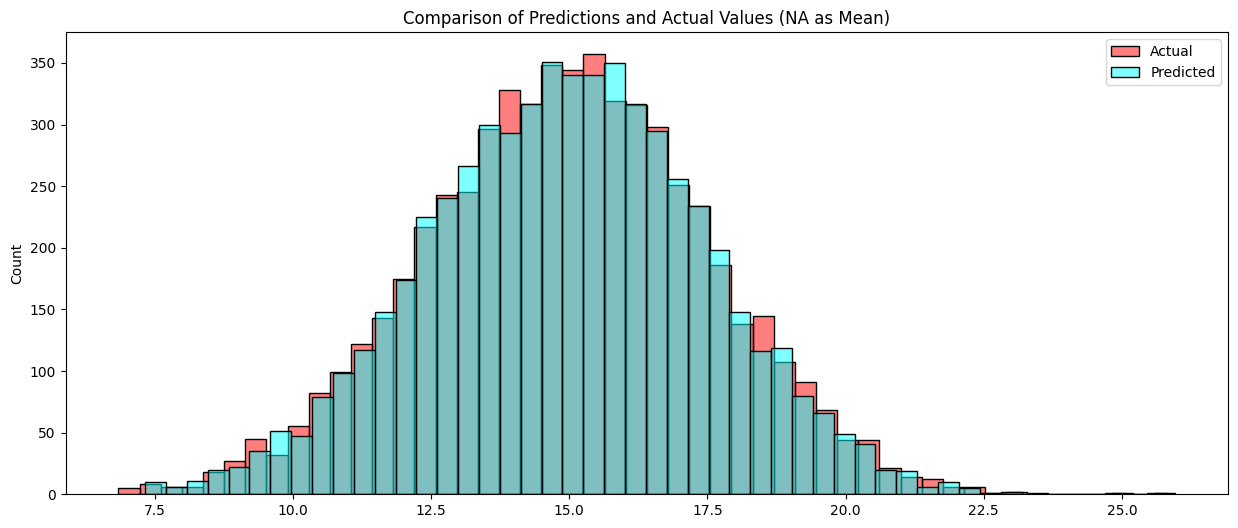

In [40]:
import matplotlib.pyplot as plt

title = "Comparison of Predictions and Actual Values (NA as Mean)"

create_diagram(y_train_mean, y_predict_for_mean_as_na, title)

#### Question 3.5. Use the validation dataset to evaluate the models and compare the RMSE of each option.

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$


In [41]:
def get_rmse(y_actual, y_prediction) -> float:
    sum_of_diffs = 0
    for i in range(len(y_actual)):
        sum_of_diffs += (y_actual[i] - y_prediction[i])**2

    result = math.sqrt(sum_of_diffs / len(y_actual))
    return result

##### In case of replacing NA with zeros

In [42]:
y_pred_validation_dataset_for_zeros_as_na = w0_for_zeros_as_na + X_validation_with_zeros.dot(weights_for_zeros_as_na)

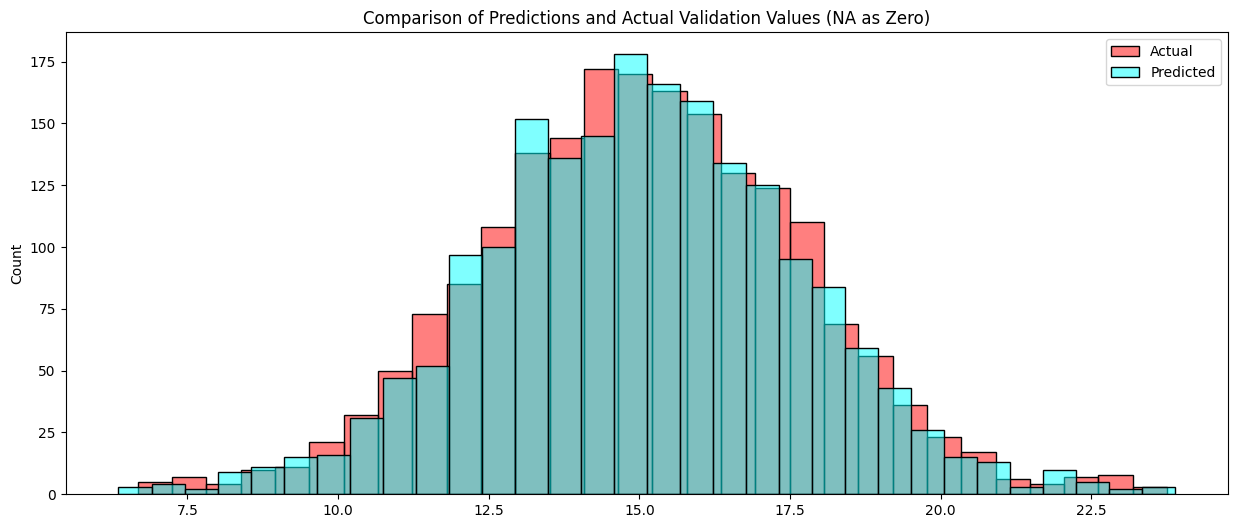

In [43]:
title = "Comparison of Predictions and Actual Validation Values (NA as Zero)"

create_diagram(y_validation_with_zeros, y_pred_validation_dataset_for_zeros_as_na, title)

In [44]:
rmse = get_rmse(y_validation_with_zeros, y_pred_validation_dataset_for_zeros_as_na)
print(f"The RMSE value in case of replacing NA values with zeros: {round(rmse, 2)} ({rmse})")

The RMSE value in case of replacing NA values with zeros: 0.52 (0.5173782638844465)


##### In case of replacing NA with `mean`

In [45]:
y_pred_validation_dataset_for_mean_as_na = w0_for_mean_as_na + X_validation_with_mean.dot(weights_for_mean_as_na)

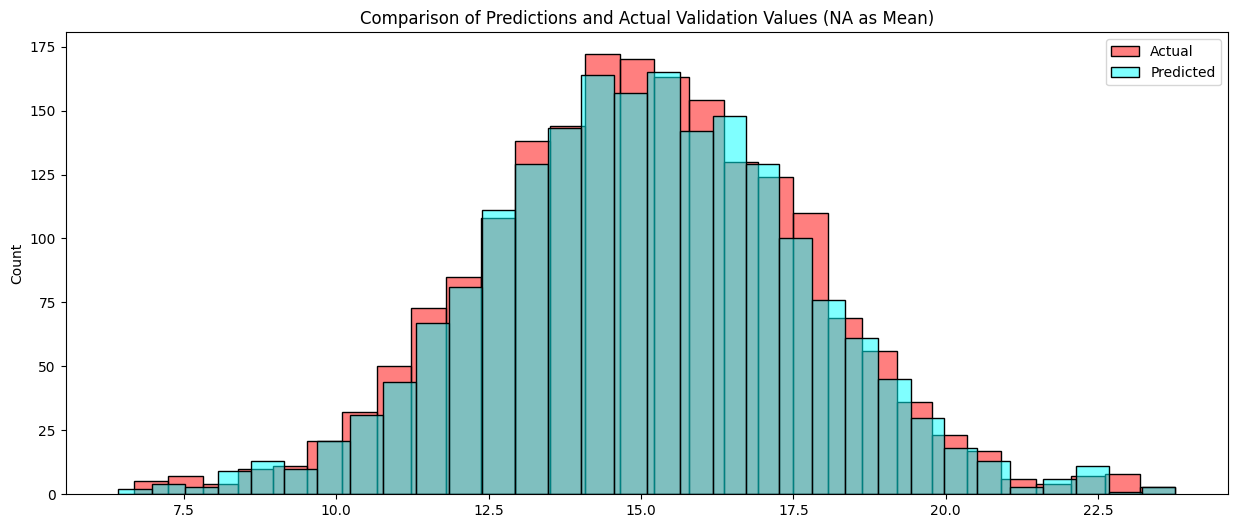

In [46]:
title = "Comparison of Predictions and Actual Validation Values (NA as Mean)"

create_diagram(y_validation_with_mean, y_pred_validation_dataset_for_mean_as_na, title)

In [47]:
rmse = get_rmse(y_validation_with_mean, y_pred_validation_dataset_for_mean_as_na)
print(f"The RMSE value in case of replacing NA values with mean: {round(rmse, 2)} ({rmse})")

The RMSE value in case of replacing NA values with mean: 0.46 (0.4635965042334583)


Let's use `sklearn` to calculate RMSE

In [48]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_validation_with_zeros, y_pred_validation_dataset_for_mean_as_na))

rmse, round(rmse, 2), rmse/100

(0.4635965042334585, 0.46, 0.004635965042334585)

##### Which option gives better RMSE?
    What happens when we impute missing values?

We have missing values ​​in a feature (for example, car weight).
We need to impute them so the model can learn.

    If we impute 0:
- This is an artificial, "unrealistic" value.
- It differs greatly from the real data unless the feature is close to zero.
- The model sees a distorted dataset, where some points are different from the rest.

This introduces noise → worse predictions → higher RMSE.

    If we impute the mean:
- This is a more "realistic" value that corresponds to the overall level of the feature.
- We preserve the statistical structure of the data.

The model is less confused because the imputed values ​​are not as outliers.

Errors become smaller → lower RMSE.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

##### Why do we need this?
We need this, because of the `Singular matrix` issue. See the example below.

In [49]:
X = [
  [1, 2, 2],
  [2, 1, 1],
  [3, 1, 1]
]

X = np.array(X)

In [50]:
# np.linalg.inv(X.T)

# The output is:
# raise LinAlgError("Singular matrix")
# LinAlgError: Singular matrix


##### How can we solve this?
We need to add a small value to the diagonal elements.

In [51]:
X = [
    [1.00000001, 2,          2],
    [2,          1.00000001, 1],
    [3,          1,          1.00000001]
]

X = np.array(X)

In [52]:
XT_inv = np.linalg.inv(X.T)
XT_inv

array([[-2.50000002e-01, -1.24999999e+07,  1.25000005e+07],
       [ 2.50000000e-01,  6.25000005e+07, -6.25000006e+07],
       [ 2.50000001e-01, -3.75000003e+07,  3.75000002e+07]])

In [53]:
np.linalg.inv(XT_inv).T

array([[1.00000005, 2.00000001, 2.00000001],
       [2.00000001, 1.00000001, 1.        ],
       [3.00000001, 1.        , 1.00000001]])

#### Implement a new function to calculate linear regression with regularization.

In [54]:
def train_linear_regression_with_regularization(X, y, r):
    XT = X.T
    XTX = XT.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)

    result = XTX_inv.dot(XT).dot(y)
    return result

def calculate_weights_with_regularization(X, y, r):
    if r < 0:
        raise ValueError("Regularization parameter r must be non-negative")

    ones = np.ones(X.shape[0])
    X_extended = np.column_stack([ones, X])
    linear_regression_result = train_linear_regression_with_regularization(X_extended, y, r)

    w0 = linear_regression_result[0]
    weights = linear_regression_result[1:]

    return w0, weights

In [55]:
regularization_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_values = []

for r in regularization_values:
    w0_regularization, weights_regularization = calculate_weights_with_regularization(X_train_with_zeros, y_train_with_zeros, r)

    # Calculate RMSE against validation dataset
    y_regularization = w0_regularization + X_validation_with_zeros.dot(weights_regularization)
    rmse_regularization = get_rmse(y_validation_with_zeros, y_regularization)

    rmse_values.append(rmse_regularization)

    print(r, w0_regularization, rmse_regularization, round(rmse_regularization, 2), weights_regularization)

0 28.82736547365895 0.5173782638844465 0.52 [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992870e-04]
0.01 24.92683841981215 0.5171115525769823 0.52 [ 0.00010643  0.0035422  -0.00501248  0.00228024]
0.1 11.239661084581073 0.5187525130702517 0.52 [ 0.00013125  0.00354212 -0.00500966  0.00907815]
1 1.7315979411219746 0.5222348802093135 0.52 [ 0.00014849  0.00354207 -0.00500771  0.01380046]
5 0.3638075020482907 0.5228916092823614 0.52 [ 0.00015098  0.00354206 -0.00500743  0.01447979]
10 0.18306246621686947 0.5229812979636599 0.52 [ 0.0001513   0.00354206 -0.00500739  0.01456956]
100 0.01841801730688404 0.5230636233819934 0.52 [ 0.00015161  0.00354204 -0.00500736  0.01465133]


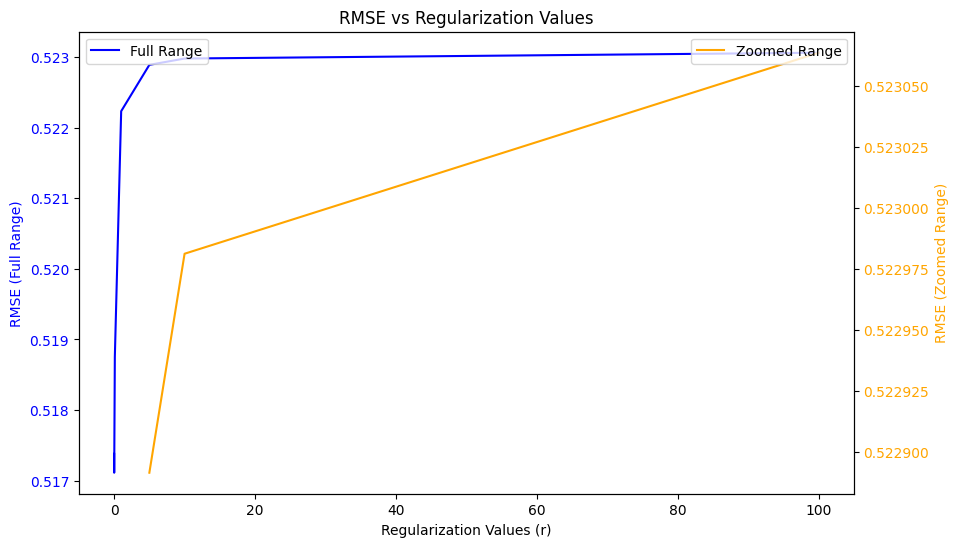

In [56]:
plt.figure(figsize=(10, 6))

# Plot the full range on the primary Y-axis
ax1 = sns.lineplot(x=regularization_values, y=rmse_values, label="Full Range", color="blue")
ax1.set_ylabel("RMSE (Full Range)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a secondary Y-axis
ax2 = ax1.twinx()
sns.lineplot(x=regularization_values[4:], y=rmse_values[4:], ax=ax2, label="Zoomed Range", color="orange")
ax2.set_ylabel("RMSE (Zoomed Range)", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Add labels and title
ax1.set_xlabel("Regularization Values (r)")
plt.title("RMSE vs Regularization Values")

# Add legends for both axes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Display the plot
plt.show()

Which `r` gives the best RMSE?
The answer is: `0`

### Answers to questions 5 and 6
Please see the solution in the file [02-hm-questions-5-6.ipynb](./src/02-regression/02-hm-questions-5-6.ipynb)